# Face Expression Detection using Deep learning

# 1. Importing all necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


import warnings
warnings.filterwarnings('ignore')
# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

Using TensorFlow backend.


# 2. Importing the dataset

In [2]:
picture_size = 48
folder_path = "../face expression detection/images/"

# 3. Data Visualization

In [1]:
expression = 'angry'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


NameError: name 'plt' is not defined

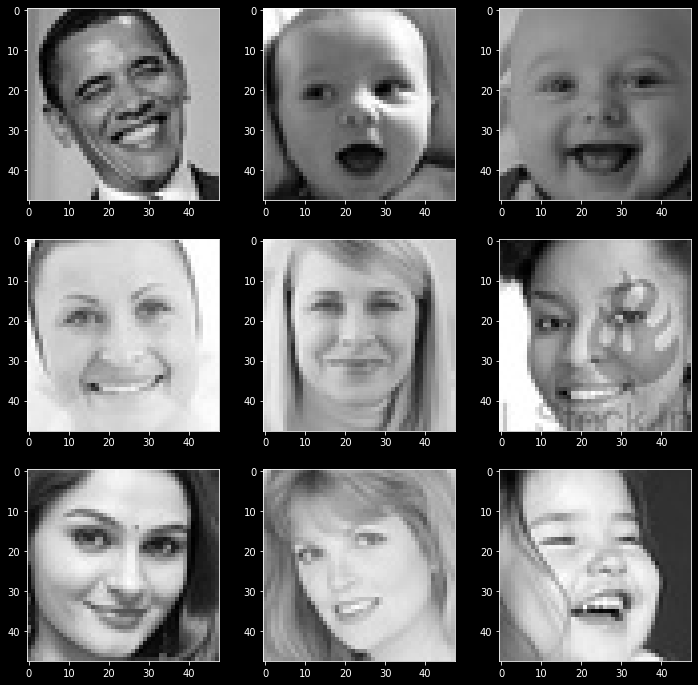

In [4]:
expression = 'happy'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


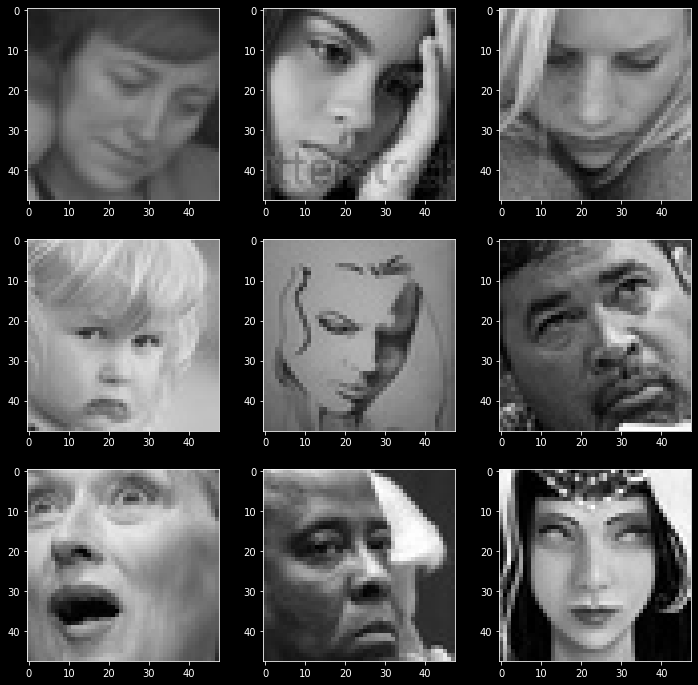

In [5]:
expression = 'sad'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


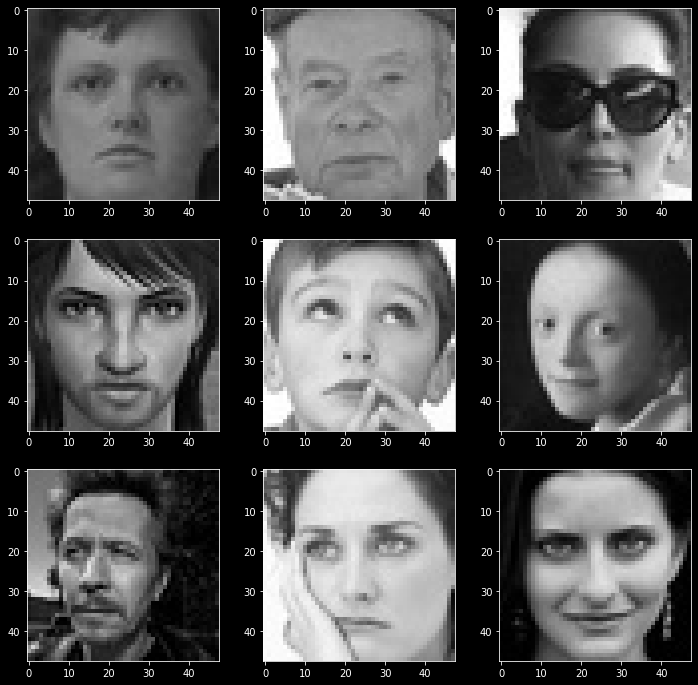

In [6]:
expression = 'neutral'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


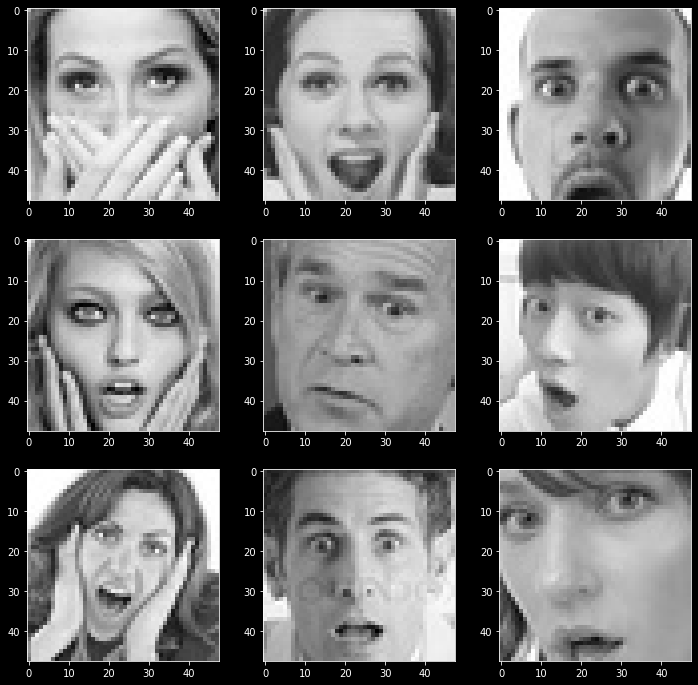

In [7]:
expression = 'surprise'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


# 4. Image Data Generator

In [8]:
batch_size  = 128   # files in each iteration

datagen_train  = ImageDataGenerator(rotation_range=30, width_shift_range=30,height_shift_range=30, zoom_range=30,
                                    horizontal_flip=True, vertical_flip=True)
datagen_val = ImageDataGenerator(rotation_range=30, width_shift_range=30,height_shift_range=30, zoom_range=30,
                                    horizontal_flip=True, vertical_flip=True)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [9]:
epochs = 10
batch_size = 10
input_shape = (48,48,1)

# 5. 3 layer CNN

In [10]:
model = Sequential()

# layer 1
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

no_of_classes=7
# CNN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_of_classes, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [13]:
import tensorflow as tf
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])


In [14]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
history = model.fit(train_set,        
          epochs=epochs,
          verbose=1,
          validation_data=test_set)

Epoch 1/10
226/226 [==============================] - 845s 4s/step - loss: 0.4877 - acc: 0.8243 - val_loss: 0.3681 - val_acc: 0.8629
Epoch 2/10
226/226 [==============================] - 674s 3s/step - loss: 0.3896 - acc: 0.8593 - val_loss: 0.3807 - val_acc: 0.8689
Epoch 3/10
226/226 [==============================] - 564s 2s/step - loss: 0.3644 - acc: 0.8672 - val_loss: 0.2653 - val_acc: 0.8749
Epoch 4/10
226/226 [==============================] - 634s 3s/step - loss: 0.3433 - acc: 0.8726 - val_loss: 0.2794 - val_acc: 0.8782
Epoch 5/10
226/226 [==============================] - 332s 1s/step - loss: 0.3318 - acc: 0.8753 - val_loss: 0.2731 - val_acc: 0.8786
Epoch 6/10
226/226 [==============================] - 114s 504ms/step - loss: 0.3182 - acc: 0.8783 - val_loss: 0.3192 - val_acc: 0.8792
Epoch 7/10
226/226 [==============================] - 114s 506ms/step - loss: 0.3082 - acc: 0.8807 - val_loss: 0.2863 - val_acc: 0.8838
Epoch 8/10
226/226 [==============================] - 117s 519m

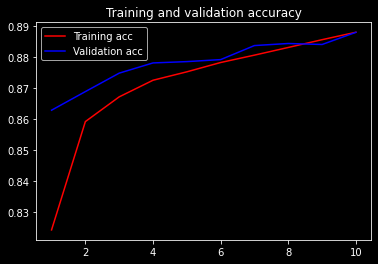

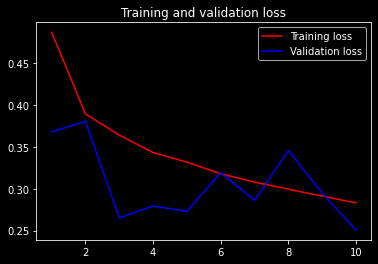

In [15]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

# 6. 3 Layer CNN with Batch Normalization

In [16]:
model = Sequential()

# layer 1
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

no_of_classes=7
# CNN structure
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_of_classes, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)         

In [19]:
import tensorflow as tf
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])


In [22]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
history = model.fit(train_set,
        
          epochs=epochs,
          verbose=1,
          validation_data=test_set)

Epoch 1/10
226/226 [==============================] - 1072s 5s/step - loss: 0.4471 - acc: 0.8186 - val_loss: 0.5807 - val_acc: 0.8575
Epoch 2/10
226/226 [==============================] - 486s 2s/step - loss: 0.3440 - acc: 0.8686 - val_loss: 0.4481 - val_acc: 0.8641
Epoch 3/10
226/226 [==============================] - 369s 2s/step - loss: 0.3090 - acc: 0.8796 - val_loss: 0.3199 - val_acc: 0.8744
Epoch 4/10
226/226 [==============================] - 375s 2s/step - loss: 0.2897 - acc: 0.8852 - val_loss: 0.3258 - val_acc: 0.8848
Epoch 5/10
226/226 [==============================] - 365s 2s/step - loss: 0.2736 - acc: 0.8907 - val_loss: 0.2992 - val_acc: 0.8836
Epoch 6/10
226/226 [==============================] - 354s 2s/step - loss: 0.2625 - acc: 0.8943 - val_loss: 0.3559 - val_acc: 0.8869
Epoch 7/10
226/226 [==============================] - 387s 2s/step - loss: 0.2508 - acc: 0.8977 - val_loss: 0.1968 - val_acc: 0.8901
Epoch 8/10
226/226 [==============================] - 673s 3s/step -

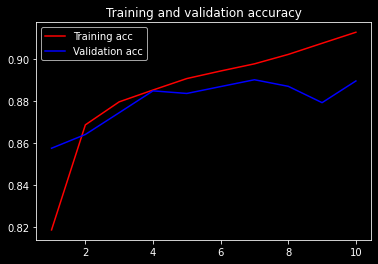

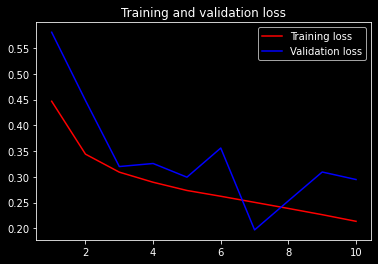

In [23]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

# 7. 5 Layer CNN

In [11]:
model_2= Sequential()
input_shape = (48,48,1)
epochs = 10
batch_size = 10
no_of_classes=7

#layer 1
model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))

#layer 2 
model_2.add(Conv2D(64,(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model_2.add(Conv2D(32,(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model_2.add(Conv2D(32,(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 5
model_2.add(Conv2D(16,(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(no_of_classes,activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)         

In [12]:
history = model_2.fit(train_set,
        
          epochs=epochs,
          verbose=1,
          validation_data=test_set)


Epoch 1/10
226/226 [==============================] - 1864s 8s/step - loss: 0.4526 - accuracy: 0.8391 - val_loss: 0.4556 - val_accuracy: 0.8571
Epoch 2/10
226/226 [==============================] - 807s 4s/step - loss: 0.4000 - accuracy: 0.8571 - val_loss: 0.4419 - val_accuracy: 0.8571
Epoch 3/10
226/226 [==============================] - 289s 1s/step - loss: 0.3912 - accuracy: 0.8572 - val_loss: 0.4307 - val_accuracy: 0.8571
Epoch 4/10
226/226 [==============================] - 299s 1s/step - loss: 0.3769 - accuracy: 0.8616 - val_loss: 0.3705 - val_accuracy: 0.8677
Epoch 5/10
226/226 [==============================] - 304s 1s/step - loss: 0.3623 - accuracy: 0.8665 - val_loss: 0.2962 - val_accuracy: 0.8722
Epoch 6/10
226/226 [==============================] - 298s 1s/step - loss: 0.3504 - accuracy: 0.8704 - val_loss: 0.2746 - val_accuracy: 0.8750
Epoch 7/10
226/226 [==============================] - 297s 1s/step - loss: 0.3427 - accuracy: 0.8730 - val_loss: 0.2852 - val_accuracy: 0.877

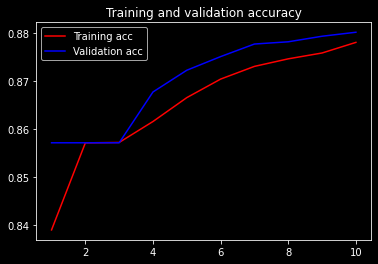

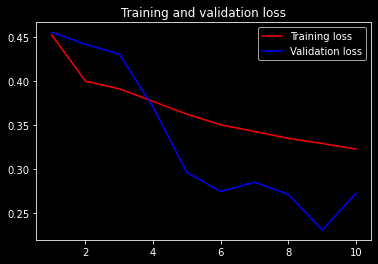

In [13]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

# 8. 5 Layer CNN with Batch Normalization

In [10]:
no_of_classes=7
model_2= Sequential()
#layer 1
model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_2.add(BatchNormalization())

#layer 2 
model_2.add(Conv2D(64,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model_2.add(Conv2D(32,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model_2.add(Conv2D(32,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))

#layer 5
model_2.add(Conv2D(16,(3,3),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(no_of_classes,activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 32)       

In [11]:

history = model_2.fit(train_set,
                     epochs=epochs,
                     verbose=1,
                     validation_data=test_set)


Epoch 1/10
226/226 [==============================] - 1558s 7s/step - loss: 0.6267 - accuracy: 0.7112 - val_loss: 0.4004 - val_accuracy: 0.8571
Epoch 2/10
226/226 [==============================] - 1310s 6s/step - loss: 0.4136 - accuracy: 0.8505 - val_loss: 0.4717 - val_accuracy: 0.8604
Epoch 3/10
226/226 [==============================] - 1054s 5s/step - loss: 0.3692 - accuracy: 0.8638 - val_loss: 0.6036 - val_accuracy: 0.8346
Epoch 4/10
226/226 [==============================] - 1256s 6s/step - loss: 0.3401 - accuracy: 0.8722 - val_loss: 0.5076 - val_accuracy: 0.8738
Epoch 5/10
226/226 [==============================] - 1376s 6s/step - loss: 0.3194 - accuracy: 0.8775 - val_loss: 0.3246 - val_accuracy: 0.8808
Epoch 6/10
226/226 [==============================] - 937s 4s/step - loss: 0.3054 - accuracy: 0.8811 - val_loss: 0.2456 - val_accuracy: 0.8833
Epoch 7/10
226/226 [==============================] - 2580s 11s/step - loss: 0.2957 - accuracy: 0.8839 - val_loss: 0.3510 - val_accuracy:

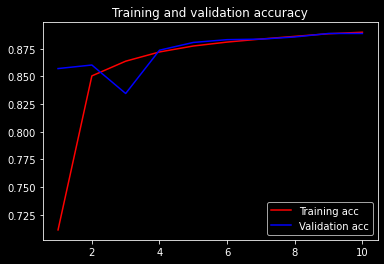

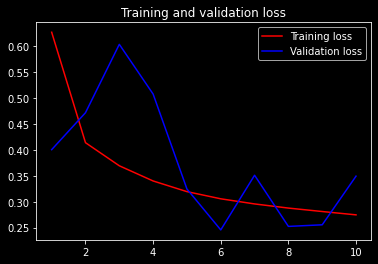

In [12]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

# 9. Conclusion

In [3]:
models = pd.DataFrame({"Model":['CNN 3 layer ','3 layer CNN with batch Normalization','5 Layer CNN','5 Layer CNN with Batch Normalization'],
           "Accuracy":[88.805,88.950,88.000, 88.88]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,3 layer CNN with batch Normalization,88.950
3,5 Layer CNN with Batch Normalization,88.880
0,CNN 3 layer,88.805
2,5 Layer CNN,88.000


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

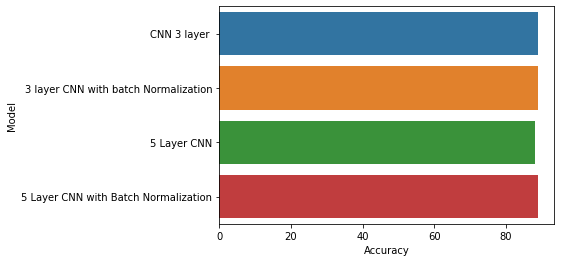

In [4]:
import seaborn as sns
sns.barplot(x= 'Accuracy', y= 'Model', data= models)